In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
citations = pd.read_csv("citations.csv")

C:\Users\Owner\AppData\Local\Temp\ipykernel_17176\2999682301.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  citations = pd.read_csv("citations.csv")


In [7]:
citations.dtypes

Citation                object
License.Plate.Vin       object
Fine                     int64
Issued                  object
CitationText            object
Unpaid                    bool
Officer                  int64
Residence               object
IssuedDate              object
IssuedTime              object
temperature_2m_max     float64
temperature_2m_min     float64
temperature_2m_mean    float64
rain_sum               float64
snowfall_sum           float64
wind_speed_10m_max     float64
CO                     float64
NO2                    float64
O3                      object
PM10                   float64
PM25                    object
dtype: object

In [8]:
def parse_num(s):
    if len(str(s)) < 1:
        return None
    else:
        parsed = ''.join(re.findall(r'\d+\.\d+|\d+',str(s)))
        if len(parsed) > 0:
            return float(parsed)
        else:
            return None

citations["O3"] = citations["O3"].apply(lambda o: parse_num(o))
citations["PM25"] = citations["PM25"].apply(lambda p: parse_num(p))

In [17]:
citations["Residence"] = citations["Residence"].astype(str)
citations["IssusedDate"] = pd.to_datetime(citations["IssuedDate"])
citations["IssuedTime"] = pd.to_datetime(citations["IssuedTime"]).dt.time

In [18]:
citations_cleaned = citations[["Fine", "Residence", "IssuedDate", "IssuedTime", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean",
           "rain_sum", "snowfall_sum", "wind_speed_10m_max", "CO", "NO2", "O3", "PM10", "PM25"]].copy()

In [19]:
citations_cleaned

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9


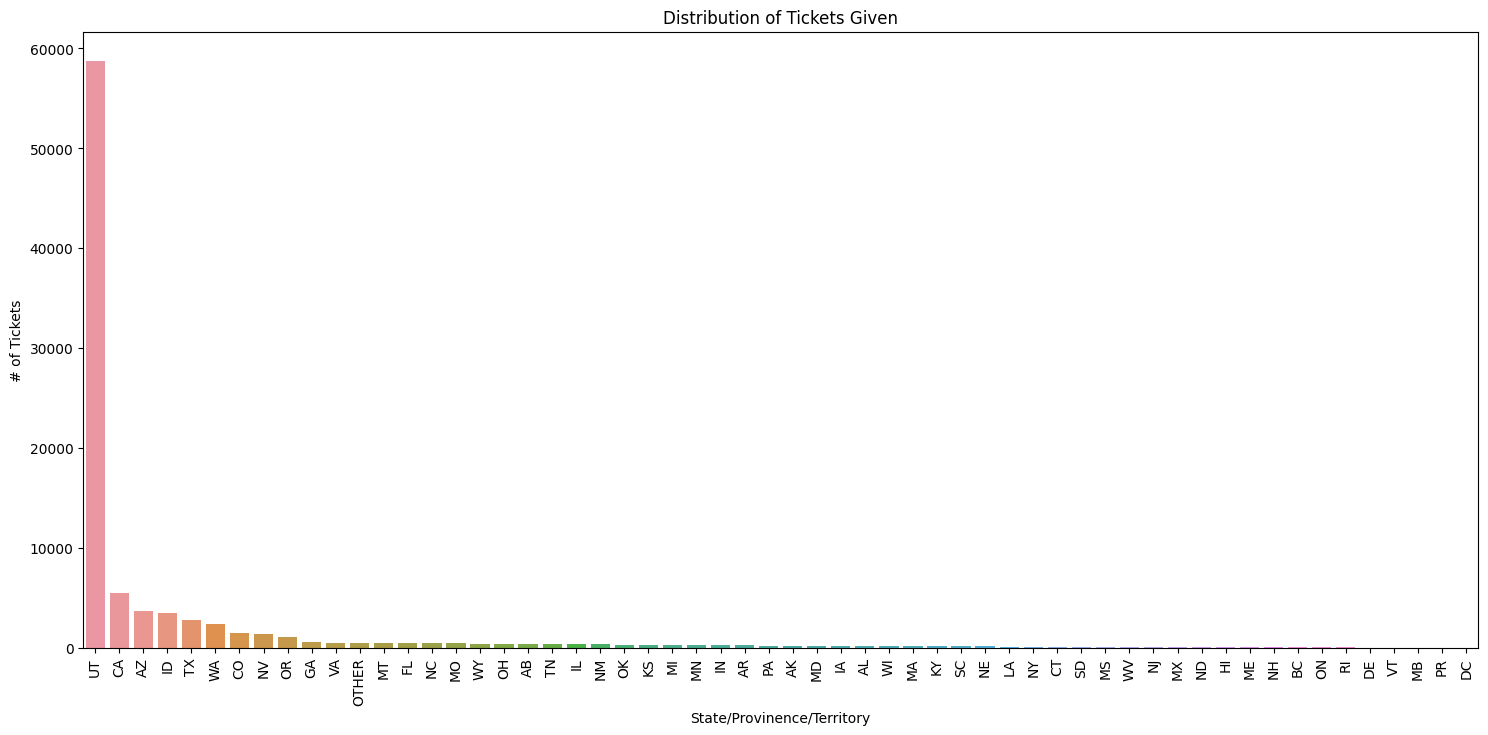

In [20]:
state_acronyms = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
    "DC", "PR", "MX",
    # Provinces of Canada
    "AB", "BC", "MB", "NB", "NL", "NS", "NT", "NU", "ON", "PE", "QC", "SK", "YT"
]

citations_cleaned["Residence"] = citations_cleaned["Residence"].apply(lambda state: state if state in state_acronyms else "OTHER")

sns.color_palette(palette='PuRd')

plt.figure(figsize=(18, 8))

sns.countplot(x="Residence", data=citations_cleaned, order=citations_cleaned['Residence'].value_counts().index)

plt.xlabel('State/Provinence/Territory')
plt.ylabel('# of Tickets')
plt.title('Distribution of Tickets Given')

plt.xticks(rotation=90)

plt.show()

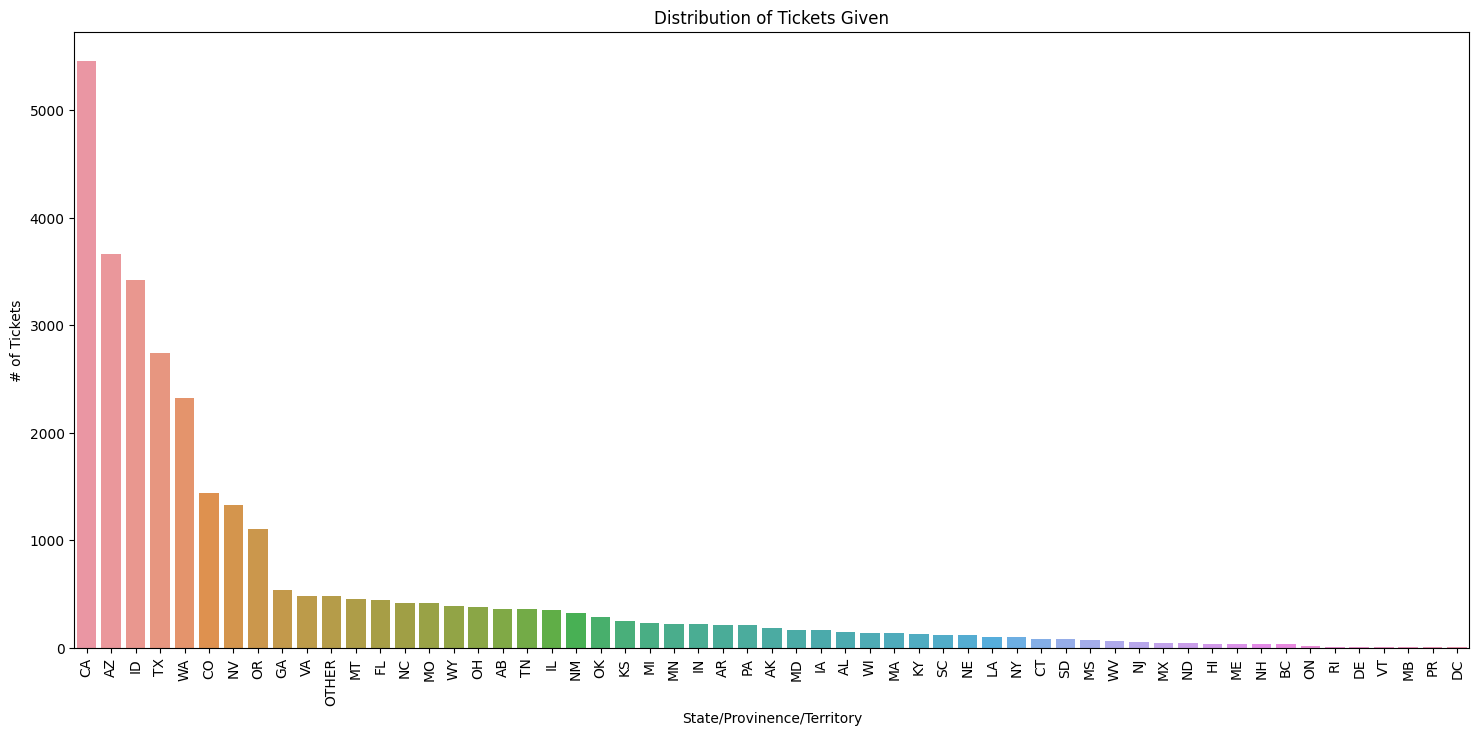

In [21]:
#Without UT included
without_ut = citations_cleaned[citations_cleaned["Residence"] != "UT"].copy()

plt.figure(figsize=(18, 8))

sns.countplot(x="Residence", data=without_ut, order=without_ut["Residence"].value_counts().index)

plt.xlabel('State/Provinence/Territory')
plt.ylabel('# of Tickets')
plt.title('Distribution of Tickets Given')

plt.xticks(rotation=90)

plt.show()

In [22]:
citations_cleaned.describe()

,Fine,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25
count,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,87736.000000,84569.000000,87936.00000,78263.000000,83526.000000
mean,31.504311,14.249084,3.065326,8.736695,0.620767,0.385865,10.664008,3.105438,26.488354,6.06119,29.035687,7.002432
std,30.833199,11.038358,9.232886,10.155197,2.020095,1.270693,4.311086,39.301936,13.372791,17.78929,39.691549,5.849266
min,0.000000,-9.100000,-20.800000,-15.400000,0.000000,0.000000,3.500000,0.000000,3.400000,0.00100,2.000000,0.000000
25%,0.000000,4.700000,-4.000000,0.400000,0.000000,0.000000,7.400000,0.300000,16.100000,0.03100,15.000000,3.700000
50%,25.000000,12.600000,2.300000,7.200000,0.000000,0.000000,9.900000,0.400000,25.500000,0.03900,23.000000,5.400000
75%,60.000000,22.900000,10.000000,16.500000,0.100000,0.000000,12.900000,0.500000,34.000000,0.04900,35.000000,8.200000
max,300.000000,38.000000,24.400000,31.100000,35.700000,17.150000,38.200000,900.000000,128.000000,87.00000,892.000000,67.200000


In [32]:
#Correct for parsing errors
citations_cleaned["CO"] = citations_cleaned["CO"].apply(lambda co: co/1000 if co > 10 else co)
citations_cleaned["O3"] = citations_cleaned["O3"].apply(lambda o: o/1000 if o > 10 else o)

In [35]:
citations_cleaned.isna().sum()

Fine                       0
Residence                  0
IssuedDate                 0
IssuedTime                 0
temperature_2m_max         0
temperature_2m_min         0
temperature_2m_mean        0
rain_sum                   0
snowfall_sum               0
wind_speed_10m_max         0
CO                      1578
NO2                     4745
O3                      1378
PM10                   11051
PM25                    5788
dtype: int64

In [42]:
citations_cleaned["IssuedDate"] = pd.to_datetime(citations_cleaned["IssuedDate"])
citations_cleaned["Month"] = citations_cleaned["IssuedDate"].dt.month
metrics_averages = citations_cleaned.groupby("Month")[["CO", "NO2", "O3", "PM10", "PM25"]].mean().reset_index()
metrics_averages

,Month,CO,NO2,O3,PM10,PM25
0,1,0.710114,38.640930,0.026099,30.723829,12.602173
1,2,0.497183,34.126861,0.034161,23.450764,7.636046
2,3,0.427579,27.346671,0.041737,21.466667,4.155081
3,4,0.324960,24.452805,0.049281,56.409998,5.208465
4,5,0.223880,16.713076,0.050261,26.219304,5.390598
5,6,0.226963,13.176081,0.057892,31.741082,7.236936
6,7,0.185300,13.959449,0.057398,33.156301,7.420410
7,8,0.272158,15.378592,0.057240,33.393685,9.310085
8,9,0.290489,18.726994,0.046803,30.045155,6.792786
9,10,0.404306,25.146851,0.036351,27.366487,5.386939


In [65]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]

citations_cleaned["NA_Correction"] = False

def match_average(row):
    for metric in metrics:
        if pd.isna(row[metric]):
            row[metric] = metrics_averages.loc[metrics_averages["Month"] == row["Month"], metric].values[0]
            row["NA_Correction"] = True
    return row

#Fill NA with corresponding monthly averages
citations_cleaned = citations_cleaned.apply(match_average, axis=1).copy()
citations_cleaned

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25,Month,NA_Correction
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False


In [67]:
citations_cleaned.isna().sum()

Fine                   0
Residence              0
IssuedDate             0
IssuedTime             0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
rain_sum               0
snowfall_sum           0
wind_speed_10m_max     0
CO                     0
NO2                    0
O3                     0
PM10                   0
PM25                   0
Month                  0
NA_Correction          0
dtype: int64

In [69]:
citations_cleaned["Day"] = citations_cleaned["IssuedDate"].dt.day_name()
citations_cleaned["Year"] = citations_cleaned["IssuedDate"].dt.year

citations_cleaned.groupby(["Year", "Month"])["Fine"].count().reset_index()

,Year,Month,Fine
0,2014,1,1046
1,2014,2,913
2,2014,3,808
3,2014,4,625
4,2014,5,747
...,...,...,...
78,2022,8,1300
79,2022,9,2132
80,2022,10,1914
81,2022,11,2094


In [71]:
citations_cleaned

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25,Month,NA_Correction,Day,Year
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022


In [132]:
citations_n = citations_cleaned.groupby("IssuedDate").count().reset_index()
citations_n["Day"] = list(range(1, citations_n.shape[0]+1))
citations_n["Week"] = citations_n["Day"].apply(lambda d: int(np.floor(d/7)+1))
citations_n = citations_n[["IssuedDate", "Week"]].copy()
citations_n

,IssuedDate,Week
0,2014-01-06,1
1,2014-01-07,1
2,2014-01-08,1
3,2014-01-09,1
4,2014-01-10,1
...,...,...
1777,2022-12-19,255
1778,2022-12-20,255
1779,2022-12-21,255
1780,2022-12-28,255


In [138]:
citations_cleaned = pd.merge(citations_cleaned, citations_n, how="left")
citations_cleaned

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25,Month,NA_Correction,Day,Year,Week
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014,1
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014,1
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014,1
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014,1
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7,1,False,Monday,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255


In [139]:
weekly_fines = citations_cleaned.groupby("Week")["Fine"].count().reset_index()
weekly_fines.columns = ["Week", "WeeklyNumFines"]
weekly_fines

,Week,WeeklyNumFines
0,1,109
1,2,307
2,3,329
3,4,469
4,5,244
...,...,...
250,251,571
251,252,483
252,253,861
253,254,297


In [140]:
citations_cleaned = pd.merge(citations_cleaned, weekly_fines, how="left")

In [141]:
citations_cleaned

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,...,NO2,O3,PM10,PM25,Month,NA_Correction,Day,Year,Week,WeeklyNumFines
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,109
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,109
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,109
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,109
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255,20
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255,20
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255,20
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,255,20


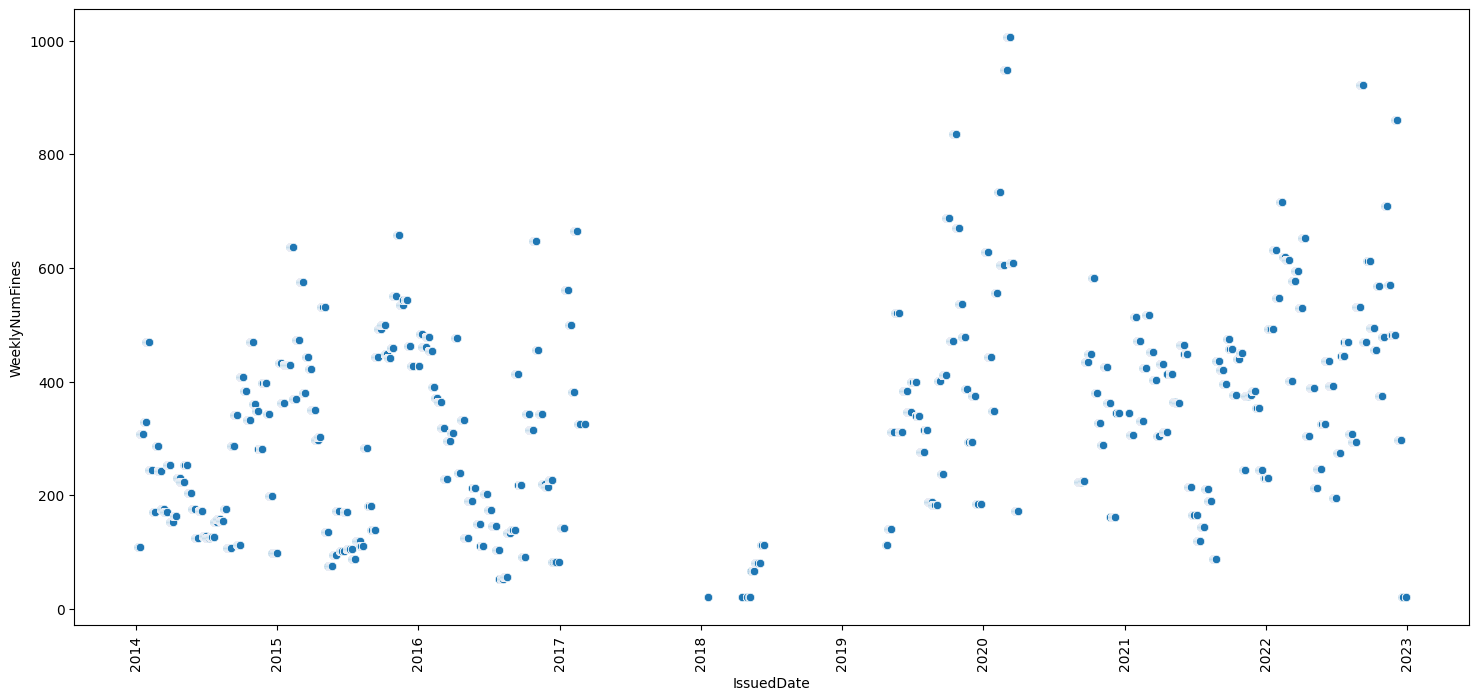

In [142]:
plt.figure(figsize=(18, 8))

sns.scatterplot(x='IssuedDate', y='WeeklyNumFines', data=citations_cleaned) 
plt.xticks(rotation=90)

plt.show()

In [122]:
citations_cleaned[~(citations_cleaned["IssuedDate"].dt.year.isin([2018, 2019]))]

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,...,NO2,O3,PM10,PM25,Month,NA_Correction,Day,Year,Week,AvgWeeklyNumFines
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,23
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,23
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,23
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,23
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,47.0,0.022,47.0,13.7,1,False,Monday,2014,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,1782,10
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,1782,10
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,1782,10
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,26.9,0.032,6.0,1.9,12,False,Thursday,2022,1782,10


In [124]:
citations_cleaned.describe()

,Fine,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25,Month,Year,Week,AvgWeeklyNumFines
count,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000
mean,31.504311,14.249084,3.065326,8.736695,0.620767,0.385865,10.664008,0.432202,26.514536,0.039412,29.000975,7.017837,6.347325,2018.434445,984.915691,83.571780
std,30.833199,11.038358,9.232886,10.155197,2.020095,1.270693,4.311086,0.319235,13.156608,0.012911,37.286391,5.681883,3.753475,2.963822,507.147752,48.529705
min,0.000000,-9.100000,-20.800000,-15.400000,0.000000,0.000000,3.500000,0.000000,3.400000,0.001000,2.000000,0.000000,1.000000,2014.000000,1.000000,1.000000
25%,0.000000,4.700000,-4.000000,0.400000,0.000000,0.000000,7.400000,0.300000,16.300000,0.031000,15.000000,3.800000,3.000000,2015.000000,548.000000,48.000000
50%,25.000000,12.600000,2.300000,7.200000,0.000000,0.000000,9.900000,0.400000,25.300000,0.039000,23.450764,5.600000,6.000000,2019.000000,1045.000000,77.000000
75%,60.000000,22.900000,10.000000,16.500000,0.100000,0.000000,12.900000,0.500000,34.126861,0.048000,34.000000,8.100000,10.000000,2021.000000,1436.000000,110.000000
max,300.000000,38.000000,24.400000,31.100000,35.700000,17.150000,38.200000,2.200000,128.000000,0.087000,892.000000,67.200000,12.000000,2022.000000,1782.000000,256.000000


In [126]:
daily_fines = citations_cleaned.groupby("IssuedDate")["Fine"].count().reset_index()
daily_fines.columns = ["IssuedDate", "DailyNumFines"]
daily_fines

,IssuedDate,DailyNumFines
0,2014-01-06,23
1,2014-01-07,52
2,2014-01-08,13
3,2014-01-09,3
4,2014-01-10,16
...,...,...
1777,2022-12-19,4
1778,2022-12-20,1
1779,2022-12-21,4
1780,2022-12-28,1


In [144]:
citations_cleaned = pd.merge(citations_cleaned, daily_fines, how="left")
citations_cleaned

,Fine,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,...,O3,PM10,PM25,Month,NA_Correction,Day,Year,Week,WeeklyNumFines,DailyNumFines
0,0,CA,2014-01-06,08:50:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,0.022,47.0,13.7,1,False,Monday,2014,1,109,23
1,30,UT,2014-01-06,13:00:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,0.022,47.0,13.7,1,False,Monday,2014,1,109,23
2,8,VA,2014-01-06,12:59:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,0.022,47.0,13.7,1,False,Monday,2014,1,109,23
3,30,NM,2014-01-06,12:56:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,0.022,47.0,13.7,1,False,Monday,2014,1,109,23
4,30,MT,2014-01-06,12:55:00,-3.3,-17.6,-10.5,0.0,0.00,6.8,...,0.022,47.0,13.7,1,False,Monday,2014,1,109,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,0,WA,2022-12-29,12:39:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,0.032,6.0,1.9,12,False,Thursday,2022,255,20,10
89310,40,UT,2022-12-29,12:24:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,0.032,6.0,1.9,12,False,Thursday,2022,255,20,10
89311,40,WA,2022-12-29,12:07:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,0.032,6.0,1.9,12,False,Thursday,2022,255,20,10
89312,40,UT,2022-12-29,08:05:00,1.5,-5.9,-2.5,0.0,0.49,5.8,...,0.032,6.0,1.9,12,False,Thursday,2022,255,20,10


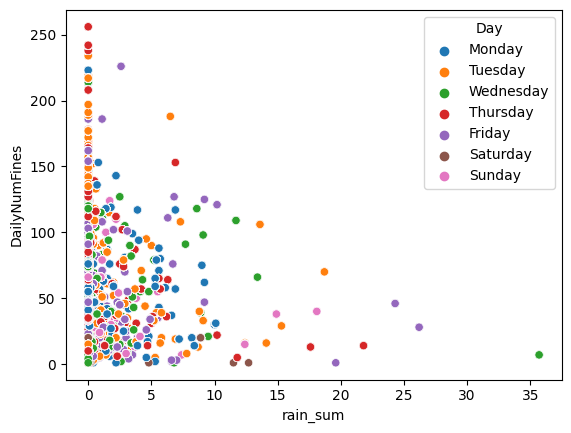

In [148]:
sns.scatterplot(x="rain_sum",
                y="DailyNumFines",
                hue="Day",
                data=citations_cleaned)

plt.show()

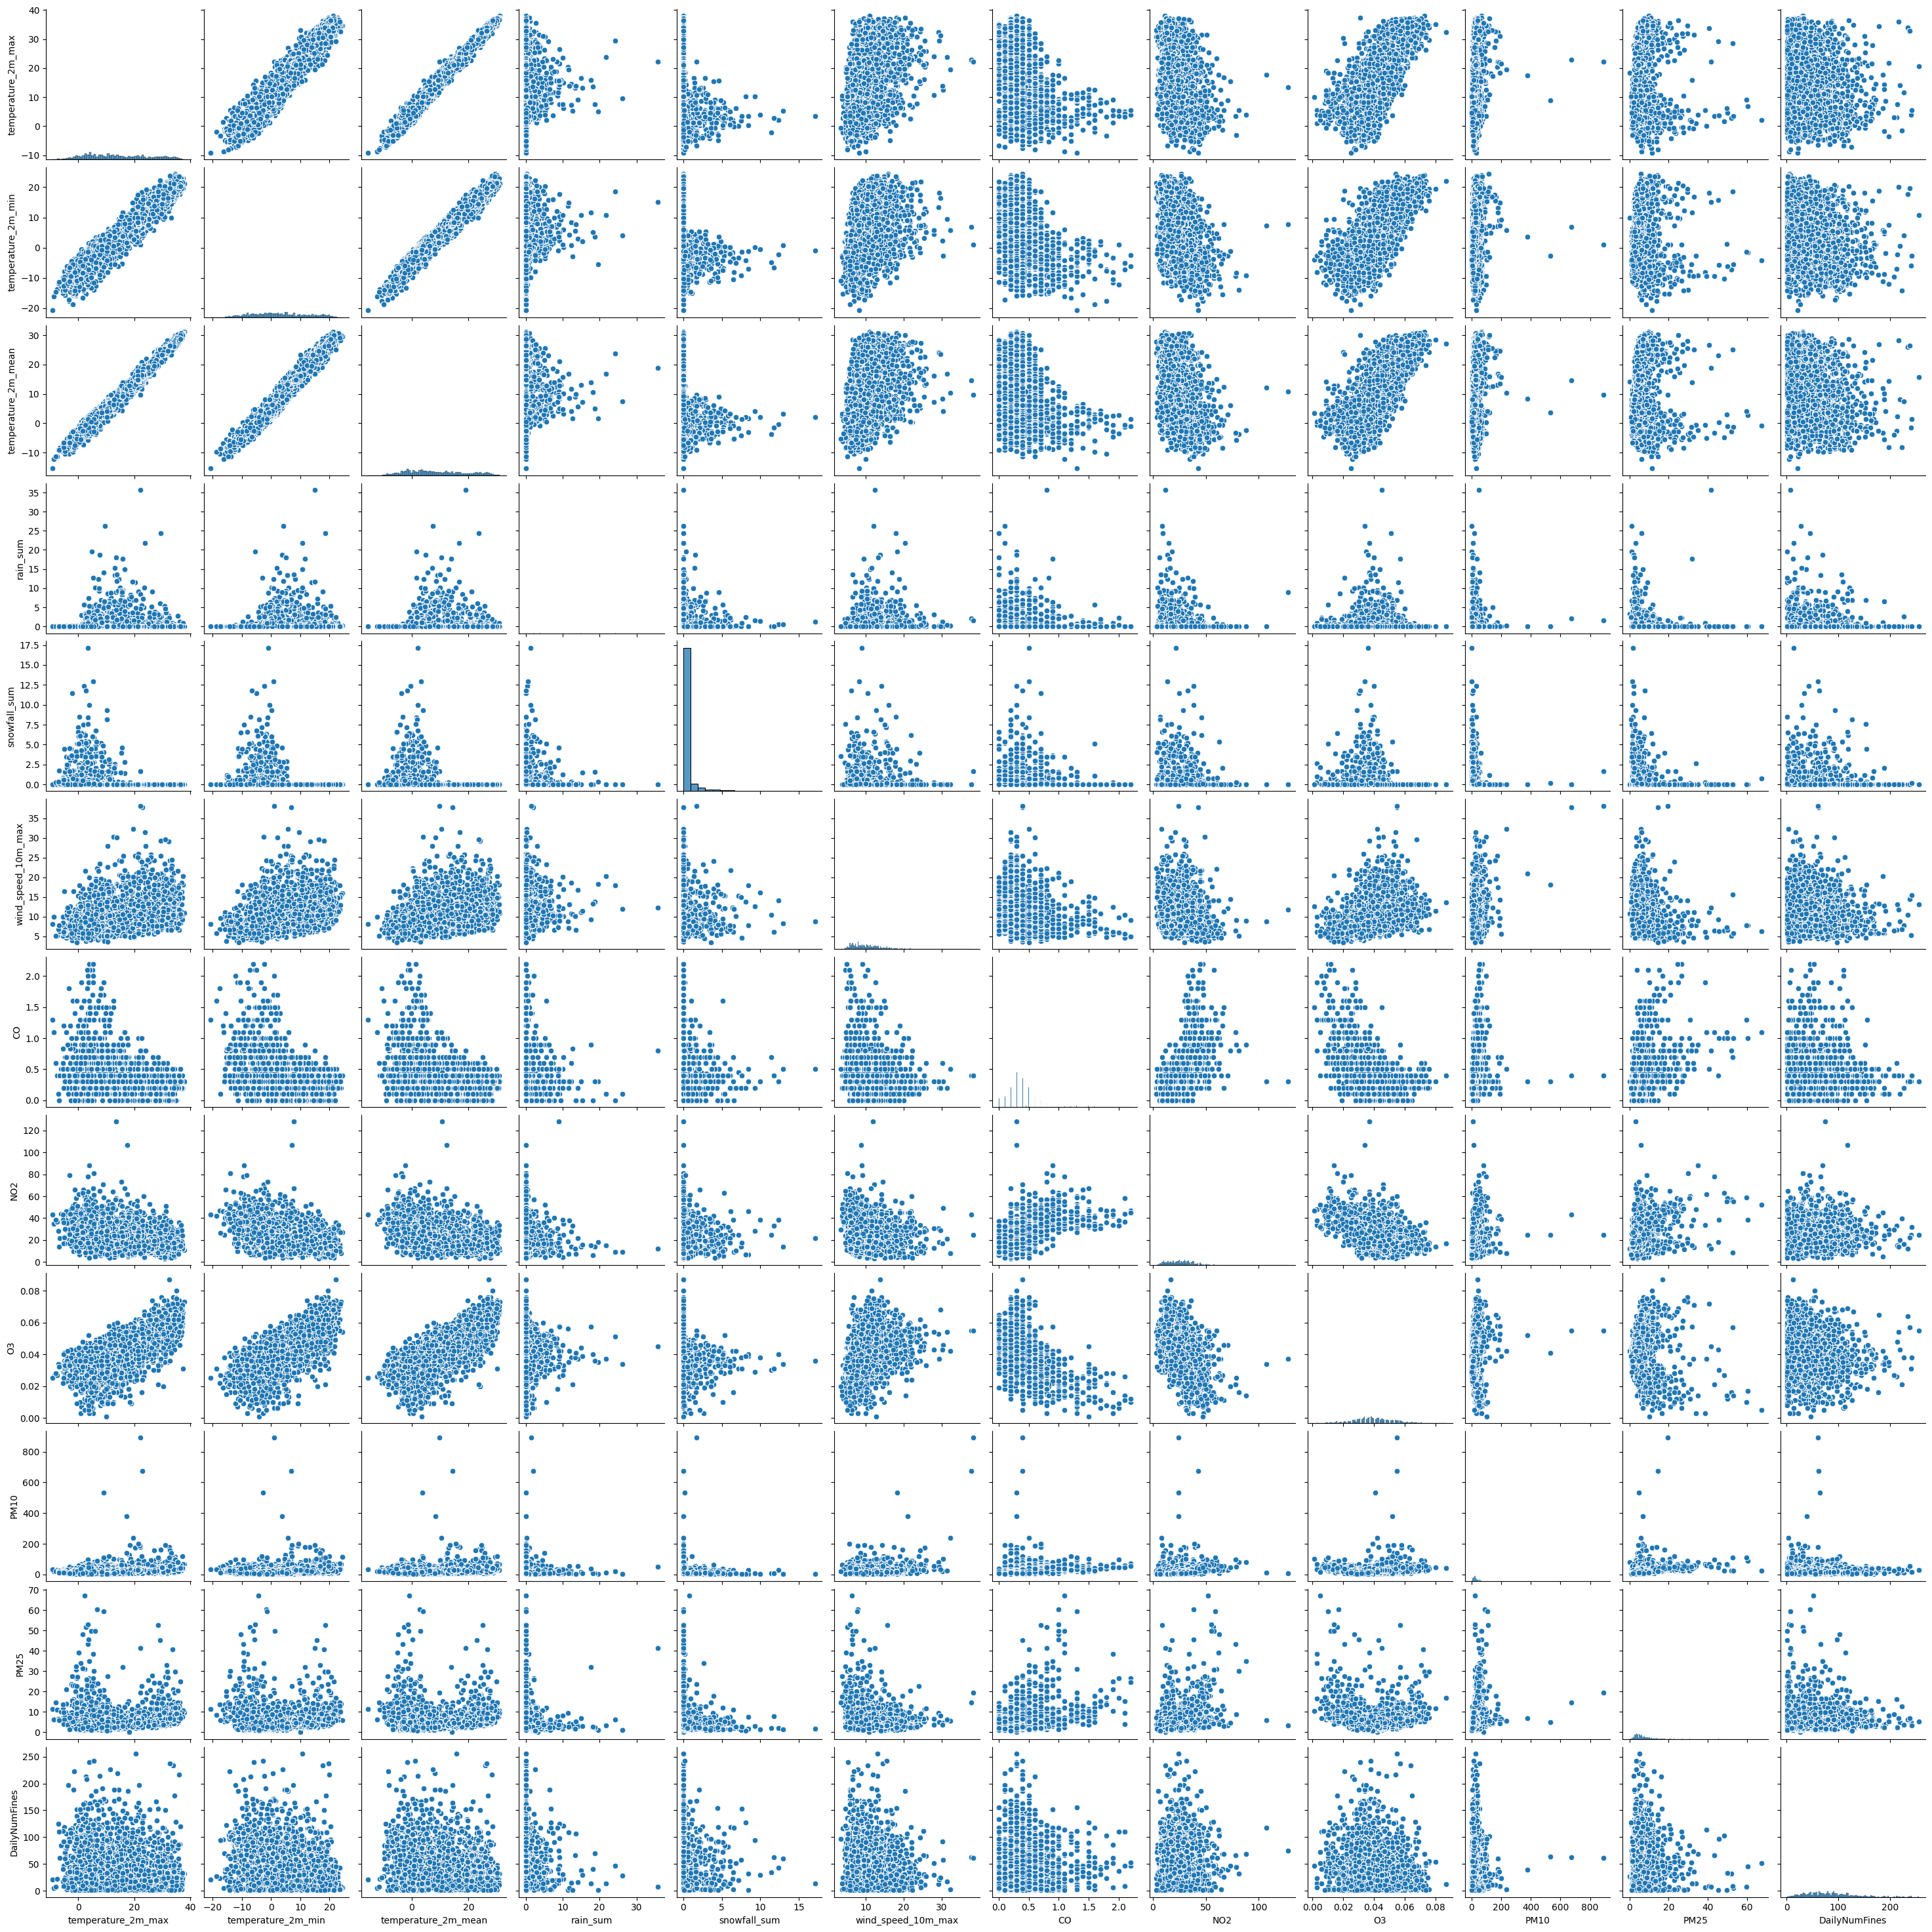

In [150]:
sns.pairplot(data=citations_cleaned, vars=["temperature_2m_min", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
                                           "CO", "NO2", "O3", "PM25", "DailyNumFines"])

plt.show()

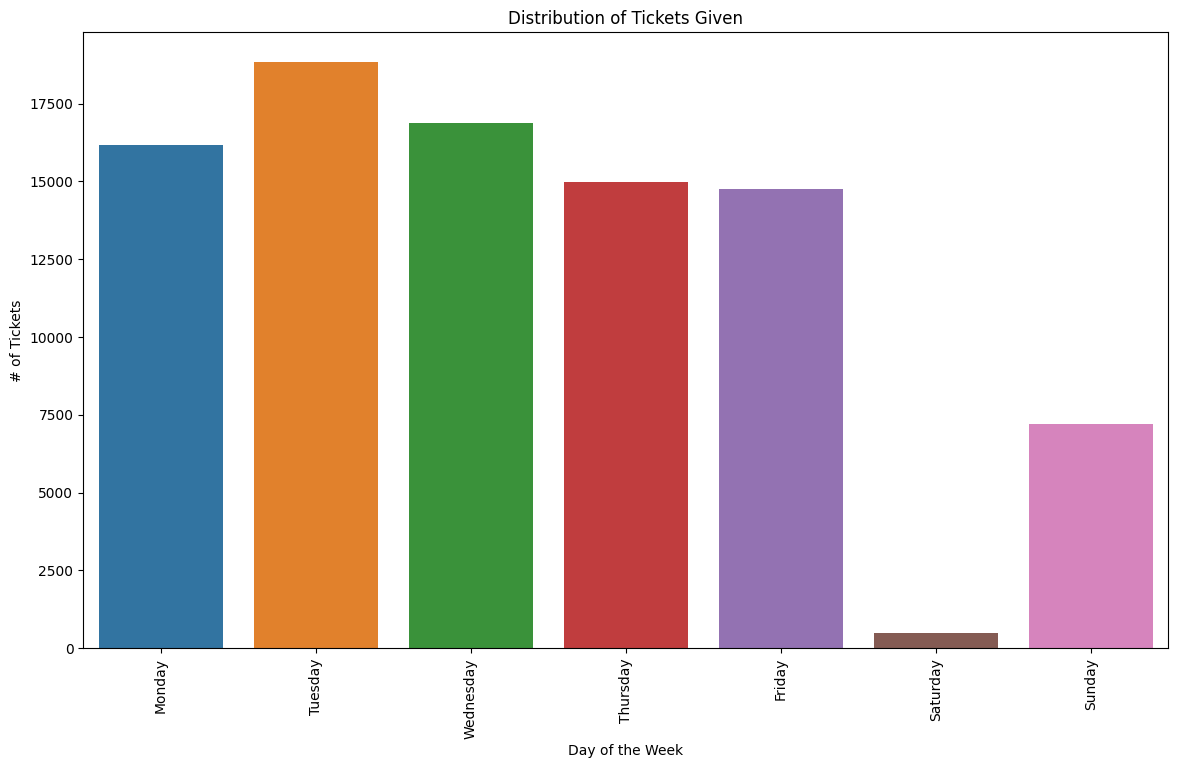

In [152]:
plt.figure(figsize=(14, 8))

sns.countplot(x="Day", data=citations_cleaned)

plt.xlabel('Day of the Week')
plt.ylabel('# of Tickets')
plt.title('Distribution of Tickets Given')

plt.xticks(rotation=90)

plt.show()

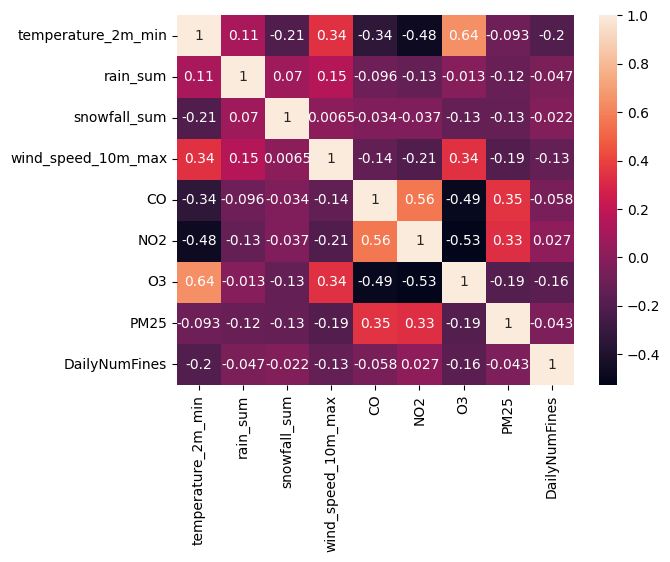

In [155]:
sns.heatmap(citations_cleaned[["temperature_2m_min", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
                                           "CO", "NO2", "O3", "PM25", "DailyNumFines"]].corr(), annot=True)

plt.show()

In [157]:
citations_cleaned.describe()

,Fine,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25,Month,Year,Week,WeeklyNumFines,DailyNumFines
count,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000,89314.000000
mean,31.504311,14.249084,3.065326,8.736695,0.620767,0.385865,10.664008,0.432202,26.514536,0.039412,29.000975,7.017837,6.347325,2018.434445,141.268222,441.426585,83.571780
std,30.833199,11.038358,9.232886,10.155197,2.020095,1.270693,4.311086,0.319235,13.156608,0.012911,37.286391,5.681883,3.753475,2.963822,72.444735,182.933990,48.529705
min,0.000000,-9.100000,-20.800000,-15.400000,0.000000,0.000000,3.500000,0.000000,3.400000,0.001000,2.000000,0.000000,1.000000,2014.000000,1.000000,20.000000,1.000000
25%,0.000000,4.700000,-4.000000,0.400000,0.000000,0.000000,7.400000,0.300000,16.300000,0.031000,15.000000,3.800000,3.000000,2015.000000,79.000000,328.000000,48.000000
50%,25.000000,12.600000,2.300000,7.200000,0.000000,0.000000,9.900000,0.400000,25.300000,0.039000,23.450764,5.600000,6.000000,2019.000000,150.000000,436.000000,77.000000
75%,60.000000,22.900000,10.000000,16.500000,0.100000,0.000000,12.900000,0.500000,34.126861,0.048000,34.000000,8.100000,10.000000,2021.000000,206.000000,537.000000,110.000000
max,300.000000,38.000000,24.400000,31.100000,35.700000,17.150000,38.200000,2.200000,128.000000,0.087000,892.000000,67.200000,12.000000,2022.000000,255.000000,1006.000000,256.000000
